In [1]:
import numpy as np
import pandas as pd
import datetime
import pandas as pd
from pandas import DataFrame
import dateutil.parser
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
# from preprocess import train_test_split
# from preprocess import n_series

In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [3]:
file_path = "/home/rahul/Downloads/bharat/time_series1/4200_C005_2019_03_03.tsv"

In [4]:
df = pd.read_csv(file_path, sep=',', header=None)
df.columns = ["kunag", "matnr", "date", "quantity","price"]

In [5]:
import numpy as np
import pandas as pd
import datetime


def n_series(input_df,kunag,matnr):
    input_df = input_df[input_df["quantity"] >=0]    
    df = input_df.copy()
    n_df1 = df[(df["kunag"] == kunag) & (df["matnr"] == matnr)]
    n_df1.date = n_df1.date.apply(lambda x : pd.to_datetime(x,format = '%Y%m%d', errors='ignore'))
    n_df1 = n_df1.sort_values('date')
    n_df1.set_index('date',inplace=True)
    weekly_resampled_data = n_df1.quantity.resample('W').sum() 
    weekly_resampled_data = weekly_resampled_data.replace(np.nan, 0)
    individual_series = weekly_resampled_data.to_frame()
    dataset = individual_series.values
    # normalize the dataset
    dataset = dataset.astype('float32')

#     scaler = MinMaxScaler(feature_range=(0, 1))
#     dataset = scaler.fit_transform(dataset)
#     individual_series = individual_series.reset_index()
    return dataset


def train_test_split(input_df,kunag,matnr,i):
    data= n_series(input_df,kunag,matnr)
    train = data[0:-i]    
    test = data[-i:-1]
    train = train.astype('float32')
    test = test.astype('float32')

#     scaler = MinMaxScaler(feature_range=(0, 1))
#     train = scaler.fit_transform(train)
#     test = scaler.fit_transform(test)
    return train,test

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [6]:
# def train_test_split(input_df,kunag,matnr,i):
#     data= n_series(input_df,kunag,matnr)
#     train = data[0:-i+1]    
#     test = data[-i-1:]
#     train = train.astype('float32')
#     test = test.astype('float32')

In [ ]:
def lstm1(input_df, kunag,matnr,n):
    dataset = n_series(input_df,kunag,matnr)
    print("dataset ;",dataset.shape)
    i = 0
    lst = []
    test1 = train_test_split(df,kunag,matnr,n)[1]
    y_hat_avg = test1.copy()
    for i in range(n,3,-1):
        print("count :",i)
        scaler = MinMaxScaler(feature_range=(0, 1))

        train,test = train_test_split(df,kunag,matnr,i)
        scaler = MinMaxScaler(feature_range=(0, 1))

        
        scaler = MinMaxScaler(feature_range=(0, 1))
        train = scaler.fit_transform(train)
        test = scaler.fit_transform(test)

        print("train :", train.shape)
        print("test :", test.shape)
        # reshape into X=t and Y=t+1
        look_back = 1
#         print(train)
        

        trainX, trainY = create_dataset(train, look_back)
        testX, testY = create_dataset(test, look_back)
        # reshape input to be [samples, time steps, features]
        trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        print("trainX :", trainX.shape)
        print("testX :", testX.shape)
    return


In [ ]:
lstm1(df,500056565, 100278,16)

In [ ]:
lstm1(df,500056565, 100278,16)

In [ ]:
from pandas import Series
from matplotlib import pyplot
from pandas.plotting import lag_plot
df1 = n_series(df,500056565, 100278)
# df1 = df1.set_index('date',inplace=True)
# df1
# lag_plot(df1)
# pyplot.show()
print(df1.shape)

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(df1)
plt.show()

In [ ]:
def lstm(input_df, kunag,matnr,n):
    dataset = n_series(input_df,kunag,matnr)
    i = 0
    lst = []
    test1 = train_test_split(df,kunag,matnr,n)[1]
    y_hat_avg = test1.copy()
    for i in range(n,3,-1):
        print("count :",i)
#         scaler = MinMaxScaler(feature_range=(0, 1))

        train,test = train_test_split(df,kunag,matnr,i)
        scaler = MinMaxScaler(feature_range=(0, 1))
#         train = scaler.fit_transform(train)
#         test = scaler.fit_transform(test)
#         train = train.astype('float32')
#         test = test.astype('float32')
        
        scaler = MinMaxScaler(feature_range=(0, 1))
        train = scaler.fit_transform(train)
        test = scaler.fit_transform(test)


        # reshape into X=t and Y=t+1
        look_back = 1
#         print(train)
        

        trainX, trainY = create_dataset(train, look_back)
        testX, testY = create_dataset(test, look_back)
        # reshape input to be [samples, time steps, features]
        trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        
        # create and fit the LSTM network
       # create and fit the LSTM network
        # create and fit the LSTM network
        model = Sequential()
        model.add(LSTM(4, input_shape=(1, look_back)))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error', optimizer='adam')
        model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)
        # make predictions
        trainPredict = model.predict(trainX)

        testPredict = model.predict(testX)
        # invert predictions
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY = scaler.inverse_transform([testY])
        # calculate root mean squared error
        trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
        print('Train Score: %.2f RMSE' % (trainScore))
        testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
        print('Test Score: %.2f RMSE' % (testScore))
            # shift train predictions for plotting
        trainPredictPlot = numpy.empty_like(dataset)
        trainPredictPlot[:, :] = numpy.nan
        trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
        # shift test predictions for plotting
        testPredictPlot = numpy.empty_like(dataset)
        testPredictPlot[:, :] = numpy.nan
        testPredictPlot[len(trainPredict)+(look_back*2)+2:len(dataset)-1, :] = testPredict
        print(testPredictPlot.shape)
        # plot baseline and predictions
        plt.figure(figsize=(12,8))

        plt.plot(scaler.inverse_transform(dataset))
        plt.plot(trainPredictPlot)
        plt.plot(testPredictPlot)
        plt.show()
        break

    return trainX,testX
    

In [ ]:
train,test = lstm(df,500056565, 100278,16)

In [ ]:
def lstm1(input_df, kunag,matnr,n):
    dataset = n_series(input_df,kunag,matnr)
    i = 0
    lst = []
    test1 = train_test_split(df,kunag,matnr,n)[1]
    y_hat_avg = test1.copy()
    for i in range(n,0,-1):
        print("count :",i)
#         scaler = MinMaxScaler(feature_range=(0, 1))

        train,test = train_test_split(df,kunag,matnr,i)
        scaler = MinMaxScaler(feature_range=(0, 1))

        
        scaler = MinMaxScaler(feature_range=(0, 1))
        train = scaler.fit_transform(train)
        test = scaler.fit_transform(test)


        # reshape into X=t and Y=t+1
        look_back = 1
#         print(train)
        

        trainX, trainY = create_dataset(train, look_back)
        testX, testY = create_dataset(test, look_back)
        # reshape input to be [samples, time steps, features]
        trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        print("trainX :", trainX.shape)
        print("testX :", testX.shape)
    return
lstm1(df,500056565, 100278,18)

In [ ]:
lstm1(df,500056565, 100278,18)

In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
def n_series(input_df,kunag,matnr):
    input_df = input_df[input_df["quantity"] >=0]    
    df = input_df.copy()
    n_df1 = df[(df["kunag"] == kunag) & (df["matnr"] == matnr)]
    n_df1.date = n_df1.date.apply(lambda x : pd.to_datetime(x,format = '%Y%m%d', errors='ignore'))
    n_df1 = n_df1.sort_values('date')
    n_df1.set_index('date',inplace=True)
    weekly_resampled_data = n_df1.quantity.resample('W').sum() 
    weekly_resampled_data = weekly_resampled_data.replace(np.nan, 0)
    individual_series = weekly_resampled_data.to_frame()
    dataset = individual_series.values
#     np.array([[ [1], [2], [3]], [[4], [5], [6]], [[1], [2], [3]] ], dtype=np.float32)
#     dataset = dataset.astype('float32')
    dataset = np.array(dataset,dtype = np.float32)
    # normalize the dataset
    # normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
#     individual_series = individual_series.reset_index()
    return dataset

In [ ]:
# n_series(df,500056565, 100278)

In [6]:
import numpy as np
import pandas as pd
import datetime


def n_series(input_df,kunag,matnr):
    input_df = input_df[input_df["quantity"] >=0]    
    df = input_df.copy()
    n_df1 = df[(df["kunag"] == kunag) & (df["matnr"] == matnr)]
    n_df1.date = n_df1.date.apply(lambda x : pd.to_datetime(x,format = '%Y%m%d', errors='ignore'))
    n_df1 = n_df1.sort_values('date')
    n_df1.set_index('date',inplace=True)
    weekly_resampled_data = n_df1.quantity.resample('W').sum() 
    weekly_resampled_data = weekly_resampled_data.replace(np.nan, 0)
    individual_series = weekly_resampled_data.to_frame()
    dataset = individual_series.values
    # normalize the dataset
    dataset = dataset.astype('float32')

#     scaler = MinMaxScaler(feature_range=(0, 1))
#     dataset = scaler.fit_transform(dataset)
#     individual_series = individual_series.reset_index()
    return dataset


def train_test_split(input_df,kunag,matnr,i):
    data= n_series(input_df,kunag,matnr)
    train = data[0:-i]    
    test = data[-i:-1]
    train = train.astype('float32')
    test = test.astype('float32')

#     scaler = MinMaxScaler(feature_range=(0, 1))
#     train = scaler.fit_transform(train)
#     test = scaler.fit_transform(test)
    return train,test

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [7]:


def n_series1(input_df,kunag,matnr):
    input_df = input_df[input_df["quantity"] >=0]    
    df = input_df.copy()
    n_df1 = df[(df["kunag"] == kunag) & (df["matnr"] == matnr)]
    n_df1.date = n_df1.date.apply(lambda x : pd.to_datetime(x,format = '%Y%m%d', errors='ignore'))
    n_df1 = n_df1.sort_values('date')
    n_df1.set_index('date',inplace=True)
    weekly_resampled_data = n_df1.quantity.resample('W').sum() 
    weekly_resampled_data = weekly_resampled_data.replace(np.nan, 0)
    individual_series = weekly_resampled_data.to_frame()
#     dataset = individual_series.values
#     main_series = individual_series.reset_index()
    return individual_series

def n_series2(input_df,kunag,matnr):
    input_df = input_df[input_df["quantity"] >=0]    
    df = input_df.copy()
    n_df1 = df[(df["kunag"] == kunag) & (df["matnr"] == matnr)]
    n_df1.date = n_df1.date.apply(lambda x : pd.to_datetime(x,format = '%Y%m%d', errors='ignore'))
    n_df1 = n_df1.sort_values('date')
    n_df1.set_index('date',inplace=True)
    weekly_resampled_data = n_df1.quantity.resample('W').sum() 
    weekly_resampled_data = weekly_resampled_data.replace(np.nan, 0)
    individual_series = weekly_resampled_data.to_frame()
#     dataset = individual_series.values
    main_series = individual_series.reset_index()
    return main_series


def train_test_split1(input_df,kunag,matnr,i):
    data= n_series(input_df,kunag,matnr)
    train = data[0:-i+4]    
    test = data[-i-4:]
    return train,test

/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


            quantity
date                
2016-07-24       1.0
2016-07-31       1.0
2016-08-07       0.0
2016-08-14       0.0
2016-08-21       0.0
[[0. ]
 [0. ]
 [0.2]
 [0.2]
 [0. ]
 [0. ]
 [0. ]
 [0.2]
 [0. ]
 [0. ]]
[[0.  0.  0.2]
 [0.  0.2 0. ]
 [0.2 0.  0. ]
 [0.  0.  0. ]
 [0.  0.  0.2]
 [0.  0.2 0.2]
 [0.2 0.2 0. ]
 [0.2 0.  0. ]
 [0.  0.  0. ]
 [0.  0.  0.2]]
(119, 1, 3)
Epoch 1/10
 - 2s - loss: 0.0626
Epoch 2/10
 - 0s - loss: 0.0490
Epoch 3/10
 - 0s - loss: 0.0444
Epoch 4/10
 - 0s - loss: 0.0428
Epoch 5/10
 - 0s - loss: 0.0424
Epoch 6/10
 - 0s - loss: 0.0422
Epoch 7/10
 - 0s - loss: 0.0419
Epoch 8/10
 - 0s - loss: 0.0419
Epoch 9/10
 - 0s - loss: 0.0418
Epoch 10/10
 - 0s - loss: 0.0417
Train Score: 0.61 RMSE
Test Score: 0.98 RMSE
trainPredict : 119
dataset : 135
testPredict : 16


/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


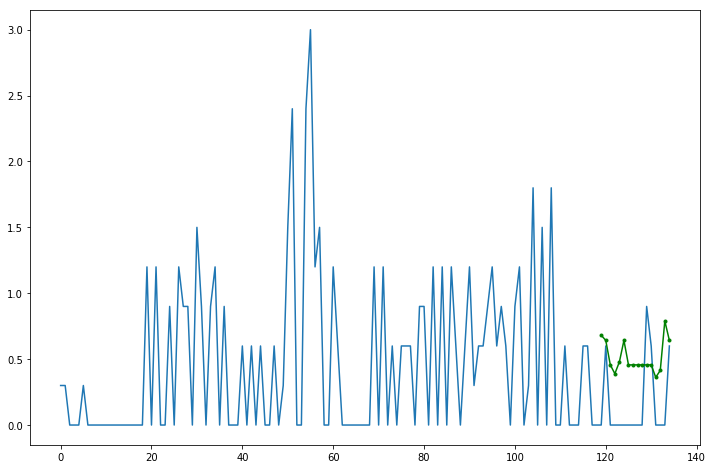

In [25]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = n_series1(df,500056565, 100278)
print(dataframe.head())
# dataframe.set_index('date',inplace=True)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
# train_size = int(len(dataset) * 0.67)
# test_size = len(dataset) - train_size
# train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

train,test = train_test_split1(df,500056565, 100278,16)
train = scaler.fit_transform(train)
test = scaler.fit_transform(test)
print(train[-10:])
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX[-10:])
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX.shape)
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=2, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
print("trainPredict :",len(trainPredict))
print("dataset :", len(dataset))
print("testPredict :", len(testPredict))
testPredictPlot[len(trainPredict)+(look_back*2)-6:len(dataset), :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(12,8))

plt.plot(scaler.inverse_transform(dataset))
# plt.plot(scaler.inverse_transform(test))
# plt.plot(dataframe.set_index("date")['quantity'])

# plt.plot(trainPredictPlot, marker=".")
plt.plot(testPredictPlot, marker=".",color = "green")
plt.show()

/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


            quantity
date                
2016-07-24       1.0
2016-07-31       1.0
2016-08-07       0.0
2016-08-14       0.0
2016-08-21       0.0
Epoch 1/10
 - 1s - loss: 0.0584
Epoch 2/10
 - 0s - loss: 0.0451
Epoch 3/10
 - 0s - loss: 0.0430
Epoch 4/10
 - 0s - loss: 0.0423
Epoch 5/10
 - 0s - loss: 0.0422
Epoch 6/10
 - 0s - loss: 0.0421
Epoch 7/10
 - 0s - loss: 0.0417
Epoch 8/10
 - 0s - loss: 0.0417
Epoch 9/10
 - 0s - loss: 0.0416
Epoch 10/10
 - 0s - loss: 0.0415
Train Score: 0.61 RMSE
Test Score: 0.99 RMSE
trainPredict : 119
dataset : 135
testPredict : 16


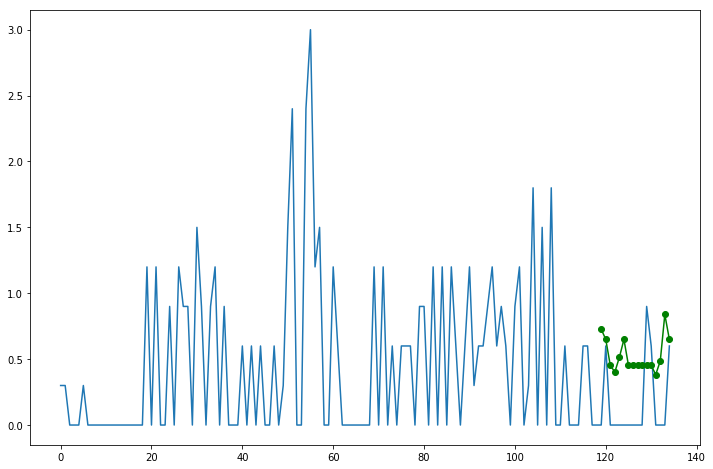

In [10]:

def ses(input_df, kunag,matnr,n):
    i = 0
    lst = []
    test1 = train_test_split(df,kunag,matnr,n)[1]
    y_hat_avg = test1.copy()
    for i in range(n,1,-1):
        numpy.random.seed(7)
    # load the dataset
        dataframe = n_series1(df,500056565, 100278)
        print(dataframe.head())

        dataset = dataframe.values
        dataset = dataset.astype('float32')
        # normalize the dataset
        scaler = MinMaxScaler(feature_range=(0, 1))
        dataset = scaler.fit_transform(dataset)
        # split into train and test sets
        # train_size = int(len(dataset) * 0.67)
        # test_size = len(dataset) - train_size
        # train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

        train,test = train_test_split1(df,500056565, 100278,n)
        train = scaler.fit_transform(train)
        test = scaler.fit_transform(test)

        # reshape into X=t and Y=t+1
        look_back = 3
        trainX, trainY = create_dataset(train, look_back)
        testX, testY = create_dataset(test, look_back)
        # reshape input to be [samples, time steps, features]
        trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        # create and fit the LSTM network
        model = Sequential()
        model.add(LSTM(4, input_shape=(1, look_back)))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error', optimizer='adam')
        model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)
        # make predictions
        trainPredict = model.predict(trainX)
        testPredict = model.predict(testX)
        # invert predictions
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY = scaler.inverse_transform([testY])
        lst.append(pred.iloc[0])

    pd.DataFrame(lst)
    y_hat_avg['pred_column']=lst
    plt.figure(figsize=(12,8))
    plt.plot( train.set_index("date")['quantity'], label='Train')
    plt.plot(test.set_index("date")['quantity'], label='Test')
    plt.plot(y_hat_avg.set_index("date")['pred_column'], label='SES')
    plt.legend(loc='best')
    plt.title("SES")
    plt.show()
    rms = sqrt(mean_squared_error(test1.quantity, y_hat_avg.pred_column))
    print("rms = ", rms)
    del y_hat_avg['SES']
    return y_hat_avg



numpy.random.seed(7)
# load the dataset
dataframe = n_series1(df,500056565, 100278)
print(dataframe.head())

dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
# train_size = int(len(dataset) * 0.67)
# test_size = len(dataset) - train_size
# train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

train,test = train_test_split1(df,500056565, 100278,16)
train = scaler.fit_transform(train)
test = scaler.fit_transform(test)

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
print("trainPredict :",len(trainPredict))
print("dataset :", len(dataset))
print("testPredict :", len(testPredict))
testPredictPlot[len(trainPredict)+(look_back*2)-6:len(dataset), :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(12,8))

plt.plot(scaler.inverse_transform(dataset))
# plt.plot(scaler.inverse_transform(test))
# plt.plot(dataframe.set_index("date")['quantity'])

# plt.plot(trainPredictPlot, marker=".")
plt.plot(testPredictPlot, marker="o",color = "green")
plt.show()

In [67]:

def lst(input_df, kunag,matnr,n):
    i = 0
    lst = []
    test1 = train_test_split(df,kunag,matnr,n)[1]
    y_hat_avg = test1.copy()
    for i in range(n,3,-1):
        numpy.random.seed(7)
    # load the dataset
        dataframe = n_series1(df,500056565, 100278)
#         print(dataframe.head())

        dataset = dataframe.values
        dataset = dataset.astype('float32')
        # normalize the dataset
        scaler = MinMaxScaler(feature_range=(0, 1))
        dataset = scaler.fit_transform(dataset)

        train,test = train_test_split1(df,500056565, 100278,i)
        train = scaler.fit_transform(train)
        test = scaler.fit_transform(test)

        # reshape into X=t and Y=t+1
        look_back = 3
        trainX, trainY = create_dataset(train, look_back)
        testX, testY = create_dataset(test, look_back)
        # reshape input to be [samples, time steps, features]
        trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
        print(trainX.shape)
        print(testX.shape)
        # create and fit the LSTM network
        model = Sequential()
        model.add(LSTM(4, input_shape=(1, look_back)))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error', optimizer='adam')
        model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)
        # make predictions
        trainPredict = model.predict(trainX)
        testPredict = model.predict(testX)
        # invert predictions
        trainPredict = scaler.inverse_transform(trainPredict)
        trainY = scaler.inverse_transform([trainY])
        testPredict = scaler.inverse_transform(testPredict)
        testY = scaler.inverse_transform([testY])
        print(testPredict.shape)
        testPredict=  testPredict.tolist()
        print(type(testPredict))
        lst.append(testPredict[0])
        print(testPredict[0])
        print("lst :" ,lst)
#     pd.DataFrame(lst)
#     y_hat_avg['pred_column']=lst
#     plt.figure(figsize=(12,8))
#     plt.plot( train.set_index("date")['quantity'], label='Train')
#     plt.plot(test.set_index("date")['quantity'], label='Test')
#     plt.plot(y_hat_avg.set_index("date")['pred_column'], label='SES')
#     plt.legend(loc='best')
#     plt.title("SES")
#     plt.show()
#     rms = sqrt(mean_squared_error(test1.quantity, y_hat_avg.pred_column))
#     print("rms = ", rms)
#     del y_hat_avg['SES']
    return lst


In [68]:
# lst(df,500056565, 100278,16)

In [69]:
out = lst(df,500056565, 100278,16)

/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

(119, 1, 3)
(16, 1, 3)
Epoch 1/10
 - 7s - loss: 0.0584
Epoch 2/10
 - 0s - loss: 0.0451
Epoch 3/10
 - 0s - loss: 0.0430
Epoch 4/10
 - 0s - loss: 0.0423
Epoch 5/10
 - 0s - loss: 0.0422
Epoch 6/10
 - 0s - loss: 0.0421
Epoch 7/10
 - 0s - loss: 0.0417
Epoch 8/10
 - 0s - loss: 0.0417
Epoch 9/10
 - 0s - loss: 0.0416
Epoch 10/10
 - 0s - loss: 0.0415
(16, 1)
<class 'list'>
[0.727053165435791]
lst : [[0.727053165435791]]


/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


(120, 1, 3)
(15, 1, 3)
Epoch 1/10
 - 7s - loss: 0.0574
Epoch 2/10
 - 0s - loss: 0.0451
Epoch 3/10
 - 0s - loss: 0.0429
Epoch 4/10
 - 0s - loss: 0.0426
Epoch 5/10
 - 0s - loss: 0.0420
Epoch 6/10
 - 0s - loss: 0.0419
Epoch 7/10
 - 0s - loss: 0.0416
Epoch 8/10
 - 0s - loss: 0.0416
Epoch 9/10
 - 0s - loss: 0.0415
Epoch 10/10
 - 0s - loss: 0.0417
(15, 1)
<class 'list'>
[0.656582236289978]
lst : [[0.727053165435791], [0.656582236289978]]


/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


(121, 1, 3)
(14, 1, 3)
Epoch 1/10
 - 7s - loss: 0.0570
Epoch 2/10
 - 0s - loss: 0.0449
Epoch 3/10
 - 0s - loss: 0.0425
Epoch 4/10
 - 0s - loss: 0.0423
Epoch 5/10
 - 0s - loss: 0.0420
Epoch 6/10
 - 0s - loss: 0.0417
Epoch 7/10
 - 0s - loss: 0.0420
Epoch 8/10
 - 0s - loss: 0.0415
Epoch 9/10
 - 0s - loss: 0.0413
Epoch 10/10
 - 0s - loss: 0.0411
(14, 1)
<class 'list'>
[0.438305526971817]
lst : [[0.727053165435791], [0.656582236289978], [0.438305526971817]]


/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

(122, 1, 3)
(13, 1, 3)
Epoch 1/10
 - 8s - loss: 0.0584
Epoch 2/10
 - 0s - loss: 0.0453
Epoch 3/10
 - 0s - loss: 0.0426
Epoch 4/10
 - 0s - loss: 0.0420
Epoch 5/10
 - 0s - loss: 0.0417
Epoch 6/10
 - 0s - loss: 0.0416
Epoch 7/10
 - 0s - loss: 0.0414
Epoch 8/10
 - 0s - loss: 0.0413
Epoch 9/10
 - 0s - loss: 0.0411
Epoch 10/10
 - 0s - loss: 0.0410
(13, 1)
<class 'list'>
[0.37979230284690857]
lst : [[0.727053165435791], [0.656582236289978], [0.438305526971817], [0.37979230284690857]]


/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


(123, 1, 3)
(12, 1, 3)
Epoch 1/10
 - 8s - loss: 0.0579
Epoch 2/10
 - 0s - loss: 0.0453
Epoch 3/10
 - 0s - loss: 0.0425
Epoch 4/10
 - 0s - loss: 0.0424
Epoch 5/10
 - 0s - loss: 0.0415
Epoch 6/10
 - 0s - loss: 0.0415
Epoch 7/10
 - 0s - loss: 0.0412
Epoch 8/10
 - 0s - loss: 0.0412
Epoch 9/10
 - 0s - loss: 0.0411
Epoch 10/10
 - 0s - loss: 0.0408
(12, 1)
<class 'list'>
[0.48489850759506226]
lst : [[0.727053165435791], [0.656582236289978], [0.438305526971817], [0.37979230284690857], [0.48489850759506226]]


/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


(124, 1, 3)
(11, 1, 3)
Epoch 1/10
 - 8s - loss: 0.0557
Epoch 2/10
 - 0s - loss: 0.0441
Epoch 3/10
 - 0s - loss: 0.0424
Epoch 4/10
 - 0s - loss: 0.0417
Epoch 5/10
 - 0s - loss: 0.0415
Epoch 6/10
 - 0s - loss: 0.0413
Epoch 7/10
 - 0s - loss: 0.0411
Epoch 8/10
 - 0s - loss: 0.0409
Epoch 9/10
 - 0s - loss: 0.0408
Epoch 10/10
 - 0s - loss: 0.0407
(11, 1)
<class 'list'>
[0.632003903388977]
lst : [[0.727053165435791], [0.656582236289978], [0.438305526971817], [0.37979230284690857], [0.48489850759506226], [0.632003903388977]]


/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


(125, 1, 3)
(10, 1, 3)
Epoch 1/10
 - 8s - loss: 0.0550
Epoch 2/10
 - 0s - loss: 0.0436
Epoch 3/10
 - 0s - loss: 0.0422
Epoch 4/10
 - 0s - loss: 0.0414
Epoch 5/10
 - 0s - loss: 0.0412
Epoch 6/10
 - 0s - loss: 0.0410
Epoch 7/10
 - 0s - loss: 0.0410
Epoch 8/10
 - 0s - loss: 0.0407
Epoch 9/10
 - 0s - loss: 0.0406
Epoch 10/10
 - 0s - loss: 0.0404
(10, 1)
<class 'list'>
[0.40921130776405334]
lst : [[0.727053165435791], [0.656582236289978], [0.438305526971817], [0.37979230284690857], [0.48489850759506226], [0.632003903388977], [0.40921130776405334]]


/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


(126, 1, 3)
(9, 1, 3)
Epoch 1/10
 - 8s - loss: 0.0546
Epoch 2/10
 - 0s - loss: 0.0435
Epoch 3/10
 - 0s - loss: 0.0416
Epoch 4/10
 - 0s - loss: 0.0412
Epoch 5/10
 - 0s - loss: 0.0410
Epoch 6/10
 - 0s - loss: 0.0409
Epoch 7/10
 - 0s - loss: 0.0406
Epoch 8/10
 - 0s - loss: 0.0407
Epoch 9/10
 - 0s - loss: 0.0403
Epoch 10/10
 - 0s - loss: 0.0401
(9, 1)
<class 'list'>
[0.40674108266830444]
lst : [[0.727053165435791], [0.656582236289978], [0.438305526971817], [0.37979230284690857], [0.48489850759506226], [0.632003903388977], [0.40921130776405334], [0.40674108266830444]]


/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


(127, 1, 3)
(8, 1, 3)
Epoch 1/10
 - 8s - loss: 0.0543
Epoch 2/10
 - 0s - loss: 0.0430
Epoch 3/10
 - 0s - loss: 0.0412
Epoch 4/10
 - 0s - loss: 0.0410
Epoch 5/10
 - 0s - loss: 0.0408
Epoch 6/10
 - 0s - loss: 0.0407
Epoch 7/10
 - 0s - loss: 0.0406
Epoch 8/10
 - 0s - loss: 0.0404
Epoch 9/10
 - 0s - loss: 0.0404
Epoch 10/10
 - 0s - loss: 0.0401
(8, 1)
<class 'list'>
[0.4210386872291565]
lst : [[0.727053165435791], [0.656582236289978], [0.438305526971817], [0.37979230284690857], [0.48489850759506226], [0.632003903388977], [0.40921130776405334], [0.40674108266830444], [0.4210386872291565]]


/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


(128, 1, 3)
(7, 1, 3)
Epoch 1/10
 - 8s - loss: 0.0537
Epoch 2/10
 - 0s - loss: 0.0428
Epoch 3/10
 - 0s - loss: 0.0412
Epoch 4/10
 - 0s - loss: 0.0409
Epoch 5/10
 - 0s - loss: 0.0405
Epoch 6/10
 - 0s - loss: 0.0405
Epoch 7/10
 - 0s - loss: 0.0401
Epoch 8/10
 - 0s - loss: 0.0401
Epoch 9/10
 - 0s - loss: 0.0399
Epoch 10/10
 - 0s - loss: 0.0399
(7, 1)
<class 'list'>
[0.42171961069107056]
lst : [[0.727053165435791], [0.656582236289978], [0.438305526971817], [0.37979230284690857], [0.48489850759506226], [0.632003903388977], [0.40921130776405334], [0.40674108266830444], [0.4210386872291565], [0.42171961069107056]]


/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


(129, 1, 3)
(6, 1, 3)
Epoch 1/10
 - 8s - loss: 0.0536
Epoch 2/10
 - 0s - loss: 0.0428
Epoch 3/10
 - 0s - loss: 0.0412
Epoch 4/10
 - 0s - loss: 0.0409
Epoch 5/10
 - 0s - loss: 0.0406
Epoch 6/10
 - 0s - loss: 0.0404
Epoch 7/10
 - 0s - loss: 0.0401
Epoch 8/10
 - 0s - loss: 0.0399
Epoch 9/10
 - 0s - loss: 0.0398
Epoch 10/10
 - 0s - loss: 0.0397
(6, 1)
<class 'list'>
[0.4004541039466858]
lst : [[0.727053165435791], [0.656582236289978], [0.438305526971817], [0.37979230284690857], [0.48489850759506226], [0.632003903388977], [0.40921130776405334], [0.40674108266830444], [0.4210386872291565], [0.42171961069107056], [0.4004541039466858]]


/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


(130, 1, 3)
(5, 1, 3)
Epoch 1/10
 - 8s - loss: 0.0534
Epoch 2/10
 - 0s - loss: 0.0428
Epoch 3/10
 - 0s - loss: 0.0410
Epoch 4/10
 - 0s - loss: 0.0408
Epoch 5/10
 - 0s - loss: 0.0405
Epoch 6/10
 - 0s - loss: 0.0404
Epoch 7/10
 - 0s - loss: 0.0401
Epoch 8/10
 - 0s - loss: 0.0400
Epoch 9/10
 - 0s - loss: 0.0399
Epoch 10/10
 - 0s - loss: 0.0396
(5, 1)
<class 'list'>
[0.40133392810821533]
lst : [[0.727053165435791], [0.656582236289978], [0.438305526971817], [0.37979230284690857], [0.48489850759506226], [0.632003903388977], [0.40921130776405334], [0.40674108266830444], [0.4210386872291565], [0.42171961069107056], [0.4004541039466858], [0.40133392810821533]]


/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/home/rahul/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.

In [66]:
len(out)

12

In [62]:
import itertools
merged = list(itertools.chain(*out))

In [63]:
merged

[0.7270129919052124,
 0.6565780639648438,
 0.4383182227611542,
 0.37980788946151733,
 0.48490405082702637,
 0.6320451498031616,
 0.40920087695121765,
 0.4067407548427582,
 0.4210392236709595,
 0.4217166006565094,
 0.4004535675048828,
 0.4013412892818451]

[[0.7270129919052124],
 [0.6565780639648438],
 [0.4383182227611542],
 [0.37980788946151733],
 [0.48490405082702637],
 [0.6320451498031616],
 [0.40920087695121765],
 [0.4067407548427582],
 [0.4210392236709595],
 [0.4217166006565094],
 [0.4004535675048828],
 [0.4013412892818451]]